In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
housing = pd.read_csv("housing.csv")

In [8]:
# Få en första överblick
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [9]:
housing.size, housing.ndim

(206400, 2)

In [10]:
# Vi ser att det är över 20 000 kolumner, 10 kolumner och att det är två dimensioner (dvs rader och kolumner).

In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
# Vi ser att alla förutom den sista kolumnen är float-typer, alltså tal. Medan den sista är objekt. 

In [13]:
# Hämta rader med saknade värden. axis=1 innebär gå igenom varje rad. isnull() går igenom varje element.
# Spara rader med saknade värden i missing
missing = housing[housing.isnull().any(axis=1)]

In [14]:
missing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [15]:
missing.shape[0]

207

In [16]:
# Det är 207 rader med saknade värden. Vi tar bort dessa från datasetet.
housing = housing.dropna()

In [17]:
# Beräkna mean för varje rad 
housing.mean(numeric_only=True)

longitude               -119.570689
latitude                  35.633221
housing_median_age        28.633094
total_rooms             2636.504233
total_bedrooms           537.870553
population              1424.946949
households               499.433465
median_income              3.871162
median_house_value    206864.413155
dtype: float64

In [18]:
x = np.arange(0, housing.shape[0])
pop = housing['population']

x.size, pop.size

(20433, 20433)

Text(0.5, 0, 'index')

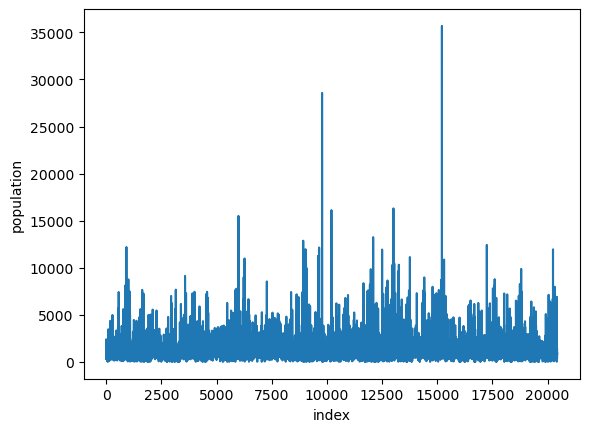

In [19]:
# Plotta population
fig, ax = plt.subplots()
ax.plot(x, pop)
plt.ylabel("population")
plt.xlabel("index")

In [20]:
# Vi sorterar störst till minsta population och gör om plotten

Text(0.5, 0, 'index')

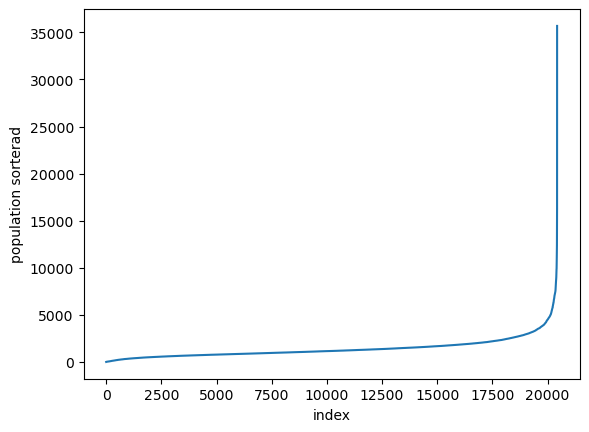

In [21]:
pop_sort = pop.sort_values()
# Plotta population sorterad
fig, ax = plt.subplots()
ax.plot(x, pop_sort)
plt.ylabel("population sorterad")
plt.xlabel("index")

In [22]:
# Vi ser att majoriteten av områderna har mindre än 5000 i population. Men sen finns det ett fåtal med kraftigt högre.

In [23]:
housing.loc[housing['population'].idxmax()]

longitude               -117.42
latitude                  33.35
housing_median_age         14.0
total_rooms             25135.0
total_bedrooms           4819.0
population              35682.0
households               4769.0
median_income            2.5729
median_house_value     134400.0
ocean_proximity       <1H OCEAN
Name: 15360, dtype: object

In [24]:
# Vi ser att den med högst antal invånare är 35682 st. 

Text(0.5, 1.0, 'House prices based on longitude latitude (location)')

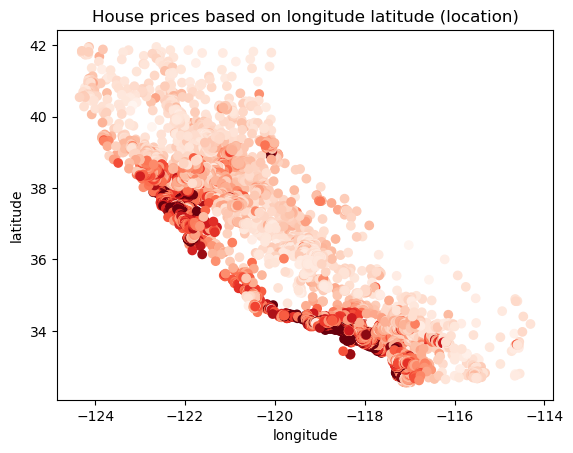

In [25]:
# Gör en heatmap med longitude/latitude

fig, ax = plt.subplots()
ax.scatter(housing['longitude'], housing['latitude'],
           c=housing['median_house_value'],
           cmap='Reds')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('House prices based on longitude latitude (location)')

In [26]:
# Vi ser på denna graf att huspriserna är betydligt högre vid kanten. Nu vet vi inte var detta är någonstans, 
# men om jag skulle gissa på förhand så känns det som att det är ett kustområde. Kanske USA:s västkust?
# Det ser även ut att vara två starka kluster med röd färg. Vilket får mig att ännu mer tro på
# USA:s västkust, med tanke på Los Angeles och San Fransisco. 

In [27]:
# Vi har en datarad med ocean_proximity. Vi kollar vilka alternativ som finns.
categories = housing['ocean_proximity'].unique()

In [28]:
# Vi gör en till longitude-latitude visualisering med olika färger för de olika alternativen. 

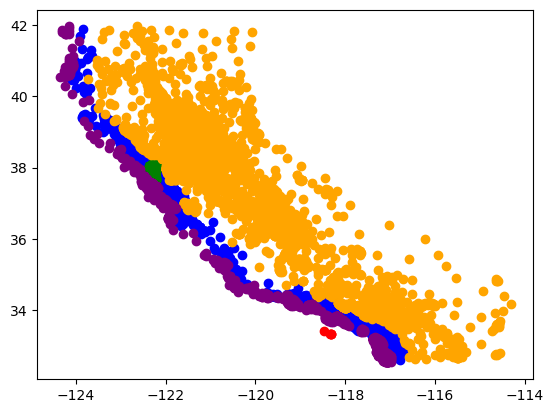

In [29]:
colors = {'<1H OCEAN': 'blue', 'NEAR BAY': 'green', 'INLAND': 'orange', 'NEAR OCEAN': 'purple', 'ISLAND': 'red'}
fix, ax = plt.subplots()
for category in categories:
    subset = housing[housing['ocean_proximity'] == category]
    plt.scatter(subset['longitude'], subset['latitude'],
    label=category, color=colors[category])

In [30]:
# Nu fick vi definitivt min teori ännu mer förstärkt. Men bara för att få det slutgiltiga facitet, 
# tar vi reda på medelkoordinat och googlar plats. 

In [31]:
latitude_mean = housing['latitude'].mean
longitude_mean = housing['longitude'].mean

In [32]:
latitude_mean, longitude_mean

(<bound method Series.mean of 0        37.88
 1        37.86
 2        37.85
 3        37.85
 4        37.85
          ...  
 20635    39.48
 20636    39.49
 20637    39.43
 20638    39.43
 20639    39.37
 Name: latitude, Length: 20433, dtype: float64>,
 <bound method Series.mean of 0       -122.23
 1       -122.22
 2       -122.24
 3       -122.25
 4       -122.25
           ...  
 20635   -121.09
 20636   -121.21
 20637   -121.22
 20638   -121.32
 20639   -121.24
 Name: longitude, Length: 20433, dtype: float64>)

In [33]:
# En googlesökning på denna koordinat bekräftas teorin. Det är mellan Los Angeles
# och San Fransisco. Vilket alltså förklarar varför huspriserna är så mycket dyrare vid ena kanten, 
# det är för att de ligger vid kusten och de som dessutom ligger i någon av städerna
# blir betydligt dyrare.

In [34]:
# Det blir självklart att även median income kommer att vara högre på dessa platser. 
# Men vi gör ändå en motsvarande heatmat för det.

Text(0.5, 1.0, 'Median income based on longitude latitude (location)')

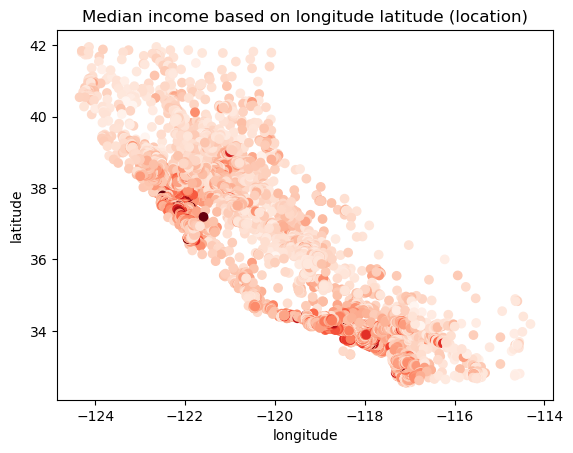

In [35]:
# Gör en heatmap med longitude/latitude

fig, ax = plt.subplots()
ax.scatter(housing['longitude'], housing['latitude'],
           c=housing['median_income'],
           cmap='Reds')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Median income based on longitude latitude (location)')

In [36]:
# Det blev faktiskt inte lika markant skillnad som huspriserna. 
# Men det syns fortfarande att två stora kluster med högre (Angeles och Fransisco) löner.

In [ ]:
# Vidare är jag intresserad av hur fördelningen ser ut på åldern av husen. Gör därför ett histogram
# för att visa antal hus per ålderskategori för husen.

Text(0.5, 1.0, 'Nr of houses per agegroup of houses')

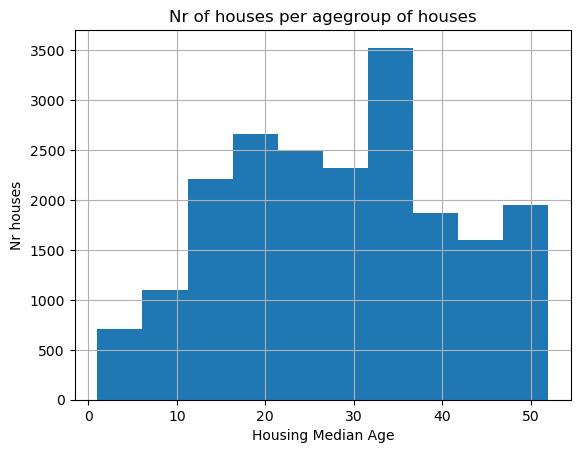

In [80]:
housing['housing_median_age'].hist()
plt.xlabel("Housing Median Age")
plt.ylabel("Nr houses")
plt.title("Nr of houses per agegroup of houses")

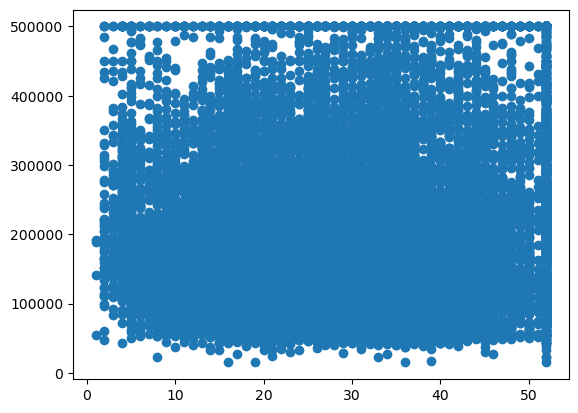

In [88]:
# Vi ser att de flesta husen är mellan 15 till 35 år gammla.
# Vi lägger till huspriser för att se om vi ser tydligt att nyare blir dyrare.
# Kan tänka mig att det inte är solklart eftersom jag tror att platsen påverkar
# priset mer än ålder på huset. Så en 30 år gammal villa vid kusten är förmodligen
# dyrare än en nybyggt långt ifrån. 
plt.scatter(housing['housing_median_age'], housing['median_house_value'])

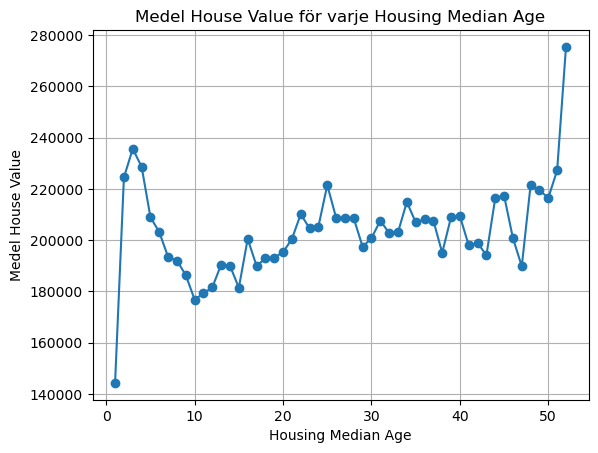

In [98]:
# Resultatet blev väldigt klustrigt. Tar och tar medelvärdet för vajre åldersgrupp istället 
mean_values = housing.groupby('housing_median_age')['median_house_value'].mean()

plt.plot(mean_values.index, mean_values.values, marker='o')
plt.xlabel("Housing Median Age")
plt.ylabel("Medel House Value")
plt.title("Medel House Value för varje Housing Median Age")
plt.grid()
plt.show()

In [68]:
# ----------- SJÄLVUTVÄRDERING --------------# 

In [ ]:
# Det som varit utmanande med kunskapskontrollen är att komma på bra sätt att visualisera datat på.
# Det absolut svåraste var heatmap med ocean-proximity. Detta för att jag behövde använda pythonkoncept
# som jag inte är van vid att använda (är i grunden C/Cpp programmerare).

# Tycker att jag ska ha godkänt för denna laboration och inte mer än det. För VG borde jag ha gjort flera olika
# typer av grafer och mer djupare analyser på alla de olika kategorierna.
# Men tycker att jag har fått en förståelse för datat och har även data som jag nu kan använda 
# eftersom den är bearbetat med att de rader som saknar något är borttagna. 